<img src="Figuras - Desafio 4/logo.png" style="width:1450px;height:250px"/>

# Ilum Escola de Ciência
### Curso: Termodinâmica Avançada
### Prof: Amauri Jardim de Paula
### Alunos: ******* ******* e ******* ******
### Desafio 4

#
# Descrição do desafio
O quarto desafio para solução do problema principal da disciplina envolve:
### **A operação do ciclo Rankine a partir da energia da combustão calculada na atividade 3.**

Considerando esse ciclo de Rankine um ciclo ideal

# Problemas
##### Para tal, alguns aspectos importantes devem ser considerados.:
##### A. Defina como funciona o ciclo de Rankine.
##### B. Use valores de entalpia para água-vapor de água tabelados para cálculo da eficiência
##### C.  Considere se o ciclo fosse de Carnot. Nesse caso, qual a eficiência teórica?


#
# Resoluções

## Importações

In [1]:
# Rode essa célula antes de rodar as seguintes, pois elas se utilizam das seguintes bibliotecas:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funcoes_desafio_4 import *

## Problema A

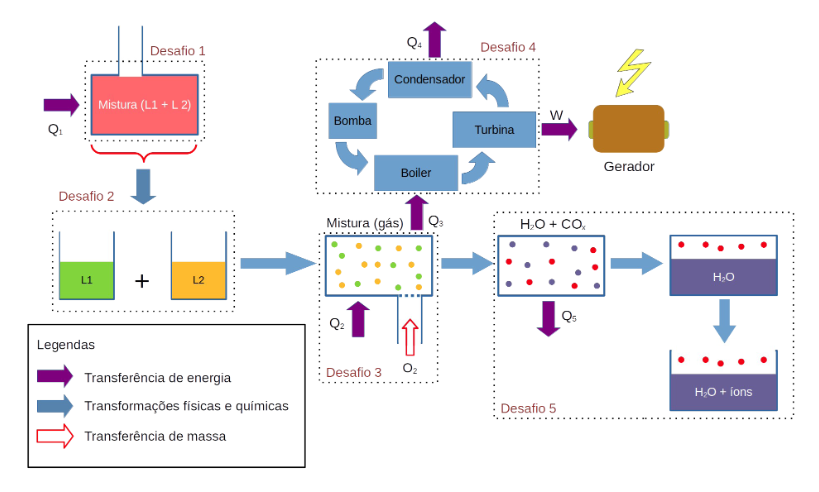

## Recapitulação

Antes de começarmos o quarto desafio, é importante retomar o que foi feito nos desafios anteriores e o que obtemos como resultado deles:

A nossa mistura inicialmente consistia em uma tonelada de água com etanol a 40% v/v e, por meio da destilação fracionada, separamo-la em etanol enriquecido e água pura. Após disso, evaporamos o etanol enriquecido a 81.54°C, o que gerou **384.73 kg de etanol enriquecido gasoso**. Por fim, realizamos eletrólise da água, através da qual extraímos **47.85 kg de hidrogênio gasoso**. Tudo isso foi feito à pressão constante de 1 atm.

A partir dos valores de massa, temperatura e pressão, no último desafio, obtemos a entalpia e a entropia geradas pela combustão do etanol enriquecido e do hidrogênio: respectivamente **-17376284.38 kJ** e **−5279693.78 𝑘 𝐽/𝐾**.

Com isso, no presente desafio, definiremos as características do nosso ciclo de Rankine, incluindo massa de água envolvida, os valores de temperatura da fonte quente e da fonte fria e, por fim, a eficiência do nosso ciclo (e compará-la com eficiência teórica do ciclo de Carnot).



O ciclo de Rankine é um ciclo termodinâmico comumente utilizado em usinas de energia térmica para gerar eletricidade. Consiste em quatro etapas principais: aquecimento, expansão, resfriamento e compressão. Cada etapa é associada a uma fórmula específica para o cálculo da entropia e da temperatura. Vamos explicar cada uma etapa separadamente

## Problema A

### Boiler

Nesta etapa, água é aquecida em uma caldeira para formar vapor de alta pressão e temperatura. Para esta etapa, foi utilizado o diagrama de Temperatura por Entropia, o qual é obtido experimentalmente a partir de sistemas de água saturada, entre líquido e vapor. A partir desse diagrama, é possível identificar as regiões em que a água está em estado líquido, gasoso ou em mudança de fase. Portanto, é possível identificar o estado da água após a adição de calor ao sistema, proveniente da combustão do etanol e do hidrogênio.

Primeiramente, nós retiramos alguns dados sobre a temperatura e a entropia da água saturada (líquido-vapor) do site [McGrau Hill](https://www.accessengineeringlibrary.com/content/book/9780071830829/back-matter/appendix4?implicit-login=true), a fim de se obter o diagrama TS. Os dados foram obtidos experimentalmente e publicados em [1].

In [2]:
ARQUIVO_EXCEL = "Dados - Desafio 4/diagrama_TS - vapor table.xlsx" # Chamando o arquivo excel
NOME_DA_PLANILHA_O = "Planilha 1" # Definindo a planila do arquivo xlsx que será utilizada
LINHA_CABECALHO = 0  # Definindo quantas linhas de cabeçalho existem, considerando que a primeira linha é a número 0
COLUNAS_CONTENDO_OS_DADOS = [0, 12, 13] # Definindo quais colunas utilizaremos para montar o data frame, considerando que a primeira coluna é a número 0

df_TS = pd.read_excel( # Criando o Data Frame do diagrama TS da água
    ARQUIVO_EXCEL,
    header=LINHA_CABECALHO,
    usecols=COLUNAS_CONTENDO_OS_DADOS,
)

df_TS.head()

,"T, °C",sf.1,sg.1
0,0.01,0.0000,9.1571
1,2.00,0.0305,9.1043
2,5.00,0.0761,9.0266
3,10.00,0.1510,8.9016
4,15.00,0.2244,8.7822


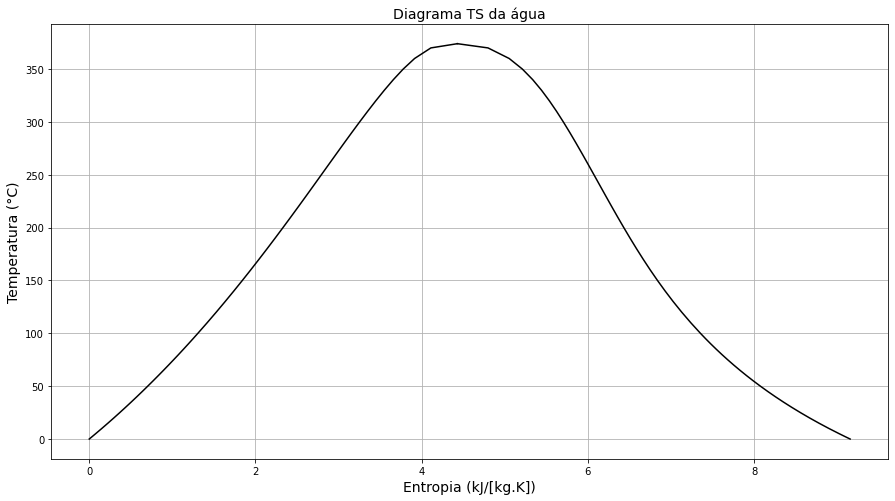

In [3]:
fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(111)
df_TS.plot('sf.1', 'T, °C', ax = ax1, c = 'black', legend = False)
df_TS.plot('sg.1', 'T, °C', ax = ax1, c = 'black', legend = False)
plt.xlabel('Entropia (kJ/[kg.K])', fontsize = 14)
plt.ylabel('Temperatura (°C)', fontsize = 14)
plt.title("Diagrama TS da água",
          fontsize=14)

plt.grid()

plt.show()

[1] J. H. Keenan, F. G. Keyes, P. G. Hill, and J. G. Moore, Steam Tables, Wiley, New York, 1969

Após a obtenção dos dados, foi necessário definir qual seria a dinâmica da água presente no nosso ciclo, para isso, foram utilizados dados em que a água estava em uma pressão de 5 MPa, obtidos em [McGrau Hill](https://www.accessengineeringlibrary.com/content/book/9780071830829/back-matter/appendix4?implicit-login=true) e publicados experimentalmente em [2].

In [4]:
ARQUIVO_EXCEL = "Dados - Desafio 4/Água Líquida - Tabela.xlsx" # Chamando o arquivo excel
NOME_DA_PLANILHA_O = "Planilha 1" # Definindo a planila do arquivo xlsx que será utilizada
LINHA_CABECALHO = 0  # Definindo quantas linhas de cabeçalho existem, considerando que a primeira linha é a número 0
COLUNAS_CONTENDO_OS_DADOS = [0, 14] # Definindo quais colunas utilizaremos para montar o data frame, considerando que a primeira coluna é a número 0

df_H2O = pd.read_excel( # Criando o Data Frame do aumento de temperatura da água
    ARQUIVO_EXCEL,
    header=LINHA_CABECALHO,
    usecols=COLUNAS_CONTENDO_OS_DADOS,
)

df_H2O.head()

,T,s.3
0,20,0.2956
1,40,0.5705
2,60,0.8285
3,80,1.0720
4,100,1.3030


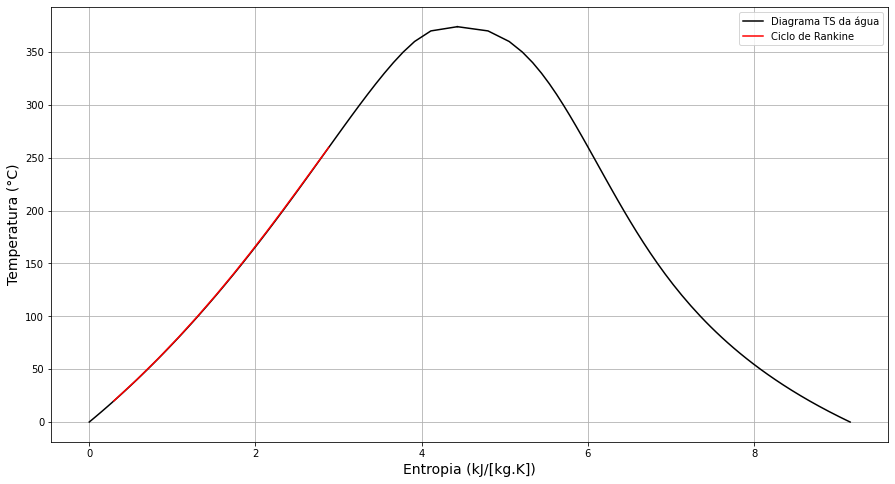

In [5]:
fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(111)
df_TS.plot('sf.1', 'T, °C', ax = ax1, c = 'black', legend = True, label = 'Diagrama TS da água')
df_TS.plot('sg.1', 'T, °C', ax = ax1, c = 'black', legend = False)
df_H2O.plot('s.3', 'T', ax = ax1, c = 'red', legend = True, label = 'Ciclo de Rankine')
plt.xlabel('Entropia (kJ/[kg.K])', fontsize = 14)
plt.ylabel('Temperatura (°C)', fontsize = 14)

plt.grid()

plt.show()

[2] Keenan, Keyes, Hill, and Moore, Steam Tables, Wiley, New York, 1969; G. J. Van Wylen and R. E. Sonntag, Fundamentals of Classical Thermodynamics, Wiley, New York, 1973.

É possível notar que a água, mostrada em vermelho, mantem condições de temperatura e entropia muito próximas aos valores de água saturada, mostrados em preto, no entanto, essas curvas só se intersectam no ponto de temperatura 260 °C, assim como mostrado em [LearChemE](https://learncheme.com/simulations/thermodynamics/thermo-1/ts-diagram-for-water/), ou seja, nesse ponto, a água entra em ebulição. Como a evaporação da água é uma mudança de fase isotérmica, é possível representá-la, no diagrama TS, como um segmento entre os pontos de mesma temperatura do gráfico.

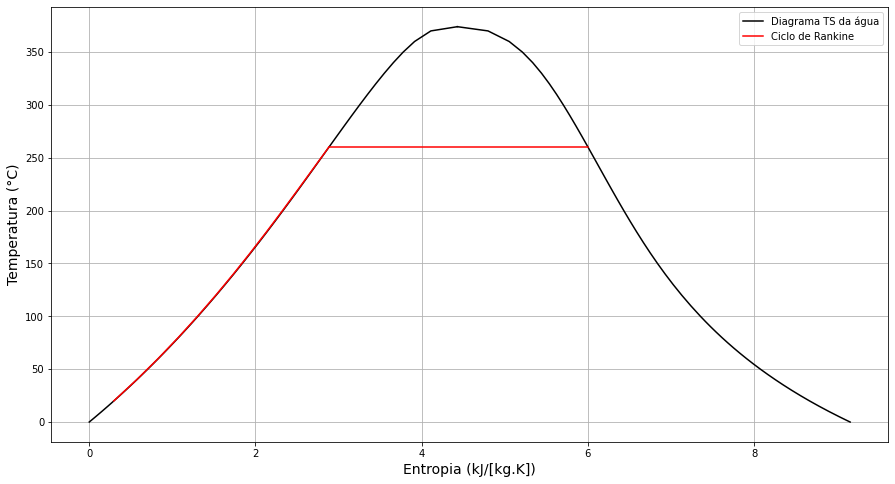

In [6]:
fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(111)
df_TS.plot('sf.1', 'T, °C', ax = ax1, c = 'black', legend = True, label = 'Diagrama TS da água')
df_TS.plot('sg.1', 'T, °C', ax = ax1, c = 'black', legend = False)
df_H2O.plot('s.3', 'T', ax = ax1, c = 'red', legend = True, label = 'Ciclo de Rankine')
ax1.plot([2.8844, 6.0028], [260, 260], c = 'red')
plt.xlabel('Entropia (kJ/[kg.K])', fontsize = 14)
plt.ylabel('Temperatura (°C)', fontsize = 14)
    
plt.grid()

plt.show()

Após a evaporação completa da água, é possível, ainda, aumentar a temperatura do vapor, dessa forma, foi escolhido que se aumentaria o valor da temperatura até se atingir valores de entropia iguais a 8.6680 kJ/(kg.K), ou seja, um valor em que não houvesse aumento de entropia na passagem pela turbina. Para isso, seria necessário estudar os valores de temperatura e entropia para o vapor de água, no entanto, devido à falta de conjunto de dados com essas informações, foi feito uma estimativa a partir da equação:

$
S(T) = S(T_0) + \int_{T}^{T_0} \frac{cp}{T} \,dT
$

É válido ressaltar que o diagrama TS, assim como os dados experimentais utilizados anteriormente, dá valores de entropia em kJ/(kg.K), ou seja, valores de entropia correspondentes a um kilograma de água, portanto, não é necessário adicionar o termo de massa da água na equação acima.

Portanto, foram utilizados os dados de calor específico do vapor d'água presentes em [Engineering Tool Box](https://www.engineeringtoolbox.com/water-vapor-d_979.html) para realizar a integral apresentada na fórmula de maneira numérica, através do método do trapézio.

In [7]:
ARQUIVO_EXCEL = "Dados - Desafio 4/Calor específico - Água.xlsx" # Chamando o arquivo excel
NOME_DA_PLANILHA_O = "Planilha 1" # Definindo a planila do arquivo xlsx que será utilizada
LINHA_CABECALHO = 0  # Definindo quantas linhas de cabeçalho existem, considerando que a primeira linha é a número 0
COLUNAS_CONTENDO_OS_DADOS_1 = [0, 2] # Definindo quais colunas utilizaremos para montar o data frame, considerando que a primeira coluna é a número 0
COLUNAS_CONTENDO_OS_DADOS_2 = [6, 8] # Definindo quais colunas utilizaremos para montar o data frame, considerando que a primeira coluna é a número 0

df_cal_esp_vap = pd.read_excel( # Criando o Data Frame do calor específico do vapor d'água por temperatura
    ARQUIVO_EXCEL,
    header=LINHA_CABECALHO,
    usecols=COLUNAS_CONTENDO_OS_DADOS_1,
)

df_cal_esp_liq = pd.read_excel( # Criando o Data Frame do calor específico da água por temperatura
    ARQUIVO_EXCEL,
    header=LINHA_CABECALHO,
    usecols=COLUNAS_CONTENDO_OS_DADOS_2,
)

In [8]:
# definição de algumas constantes
TEMP_EVAP = 260 # °C
ENTROPIA_EVAP = 6.0028 # kJ/(kg.K)

# cálculo dos pontos de entropia e temperatura do vapor d'água
temp_vap = []
entrop_vap = []
print('temperatura', '', 'entropia')
for temp in df_cal_esp_vap['T']:
    temp_vap.append(temp)
    entrop_vap.append(entropia_por_temperatura_vapor(temp, df_cal_esp_vap, TEMP_EVAP, ENTROPIA_EVAP))
    print(temp, '        ', entropia_por_temperatura_vapor(temp, df_cal_esp_vap, TEMP_EVAP, ENTROPIA_EVAP))
    if entropia_por_temperatura_vapor(temp, df_cal_esp_vap, TEMP_EVAP, ENTROPIA_EVAP) > 8.6680:
        break

temperatura  entropia
260          6.0028
275          6.054358598256749
300          6.137403725765615
325          6.217155984155676
350          6.293967334719323
375          6.368128856990949
400          6.439879205942053
450          6.577063808457944
500          6.706830586982717
550          6.830270001560632
600          6.948219742864056
650          7.061348346499528
700          7.170218263506863
750          7.27528275660629
800          7.376928834545341
850          7.475513899190901
900          7.571327254580764
950          7.6646005488569156
1000          7.755557179905836
1050          7.84437658566672
1100          7.931198545070667
1150          8.016148497229377
1200          8.099321272027101
1250          8.1808186068573
1300          8.260732919665926
1350          8.339132029080053
1400          8.416092517395606
1500          8.565925488978632
1600          8.710551900956242


Portanto, é possível perceber que a entropia que o valor de temperatura que mais se aproxima de uma entropia igual a 8.6680 kJ/(kg.K) é o valor de 1600 °C, ou seja, seria necessário esquentar a água até a temperatura de 1600 °C, essa condição de temperatura é possível devido ao fato de que a pressão no boiler é igual a 5 MPa. É importante ressaltar que essa análise não está considerando a optimização econômica do ciclo de rankine e nem levando em consideração fatores relativos à estrutura dos equipamentos.

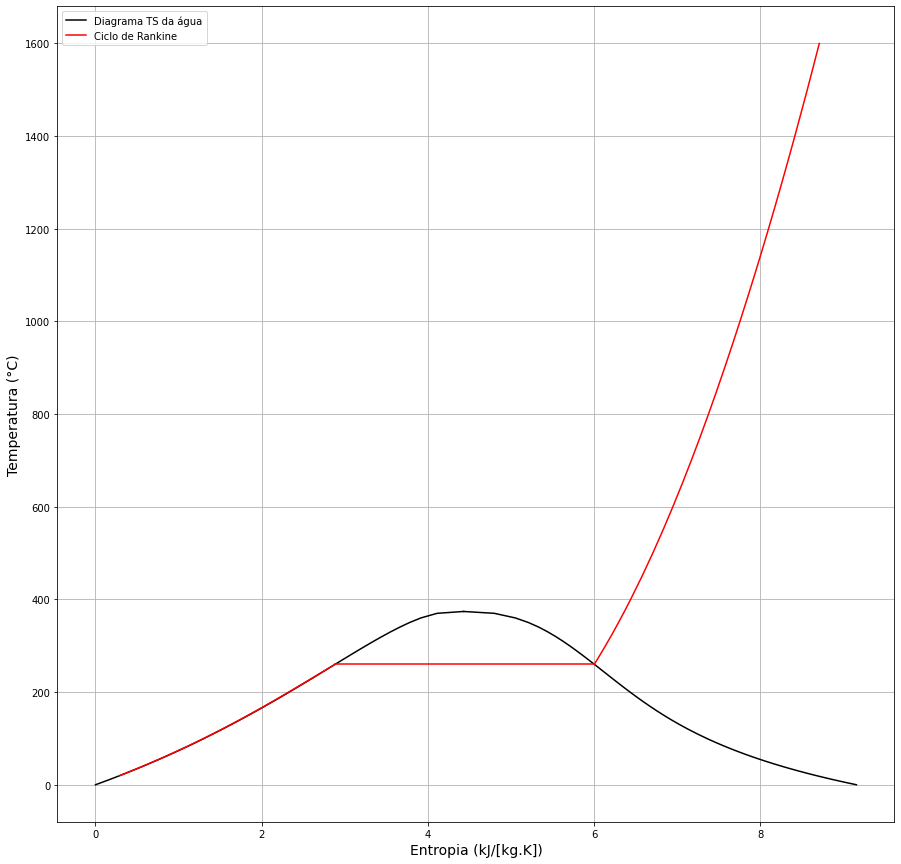

In [9]:
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(111)
df_TS.plot('sf.1', 'T, °C', ax = ax1, c = 'black', legend = True, label = 'Diagrama TS da água')
df_TS.plot('sg.1', 'T, °C', ax = ax1, c = 'black', legend = False)
df_H2O.plot('s.3', 'T', ax = ax1, c = 'red', legend = True, label = 'Ciclo de Rankine')
ax1.plot([2.8844, 6.0028], [260, 260], c = 'red')
ax1.plot(entrop_vap, temp_vap, c = 'red')
plt.xlabel('Entropia (kJ/[kg.K])', fontsize = 14)
plt.ylabel('Temperatura (°C)', fontsize = 14)
    
plt.grid()

plt.show()

Por fim, é necessário levar em conta a quantidade de energia proveniente da combustão do hidrogênio e do etanol para estimar a massa de água utilizada, através da qual seja possível o aumento de temperatura proposto.

Para isso, primeiramente, iremos calcular a entalpia utilizada no aumento da temperatura da água até o ponto de ebulição (260 °C), a partir da equação:

$
H(T) = H(T_0) + m \int_{T}^{T_0} cp \,dT
$

Portanto, serão utilizados os valores de calor específico da água líquida obtidos em [Engineering Tool Box](https://www.engineeringtoolbox.com/specific-heat-capacity-water-d_660.html).

Após, calcularemos a entalpia envolvida no processo de evaporação da água, a partir do valor de entalpia de evaporação à 260 °C, presente em [McGrau Hill](https://www.accessengineeringlibrary.com/content/book/9780071830829/back-matter/appendix4?implicit-login=true) e obtido experimentalmente em [1].

Enfim, iremos calcular a entalpia utilizada no aumento da temperatura do vapor d'água até 1600 °C, a partir dos valores de calor específico do vapor d'água obtidos anteriormente e utilizando, novamente, a equação:

$
H(T) = H(T_0) + m \int_{T}^{T_0} cp \,dT
$

Por fim, todas essas entalpias serão somadas para se calcular a entalpia total utilizada no boiler, ou seja, a entalpia necessária para o ciclo de rankine. Note que esse valor depende da massa de água utilizada, portanto, será utilizado o método da secante para se calcular valores de massa que aproximem a entalpia necessária para o funcionamento do ciclo a 17376284.38 kJ, entalpia disponível pela combustão do hidrogênio e do etanol.

In [10]:
# definição de algumas constantes
TEMP_INIT = 20 # °C
TEMP_FINAL = 1600 # °C
ENTALPIA_EVAP_260 = 1662.5 # kJ/kg
ENTALPIA_COMBUSTAO = 17376284.38 # kJ

# definição do método da secante.
def f(m):
    return ENTALPIA_COMBUSTAO - entalpia_boiler(TEMP_INIT, TEMP_EVAP, TEMP_FINAL, ENTALPIA_EVAP_260, m, df_cal_esp_liq, df_cal_esp_vap)

def metodo_secante(chute_zero, chute_um, erro):
    p0 = chute_zero
    p = chute_um
    while abs(f(p)) > erro:
        p_grava = p
        p = p - (p - p0)*f(p)/(f(p) - f(p0))
        p0 = p_grava
    return p

In [11]:
# determinação da água que será utilizada
MASSA_AGUA = metodo_secante(2000, 2100, 1) # kg
ENTALPIA_BOILER = entalpia_boiler(TEMP_INIT, TEMP_EVAP, TEMP_FINAL, ENTALPIA_EVAP_260, MASSA_AGUA, df_cal_esp_liq, df_cal_esp_vap) # kJ
print(MASSA_AGUA, ENTALPIA_BOILER)

3039.5760511531103 17376284.379999977


Portanto, para o funcionamento do ciclo na maneira como havíamos planejado, será necessário a utilização de 3039.57 kg de água, correspondendo a uma entalpia utilizada no boiler igual a aproximadamente **17376284.38 kJ**.

### Turbina 
O vapor de alta pressão gerado na caldeira é direcionado para uma turbina, onde se expande e realiza trabalho mecânico. Durante essa expansão adiabática, a entropia do vapor é constante. A temperatura do vapor na saída da turbina é calculada usando a fórmula de expansão adiabática, que relaciona as temperaturas e pressões antes e depois da expansão.

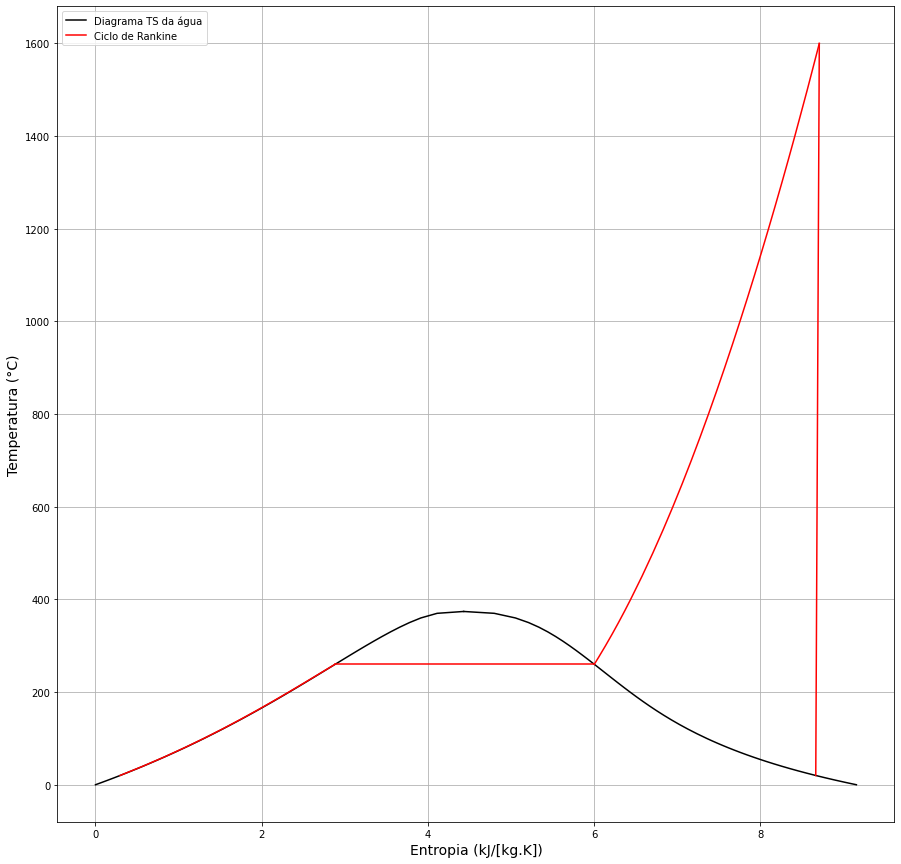

In [12]:
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(111)
df_TS.plot('sf.1', 'T, °C', ax = ax1, c = 'black', legend = True, label = 'Diagrama TS da água')
df_TS.plot('sg.1', 'T, °C', ax = ax1, c = 'black', legend = False)
df_H2O.plot('s.3', 'T', ax = ax1, c = 'red', legend = True, label = 'Ciclo de Rankine')
ax1.plot([2.8844, 6.0028], [260, 260], c = 'red')
ax1.plot(entrop_vap, temp_vap, c = 'red')
ax1.plot([entrop_vap[-1], 8.6680], [temp_vap[-1], 20], c = 'red')
plt.xlabel('Entropia (kJ/[kg.K])', fontsize = 14)
plt.ylabel('Temperatura (°C)', fontsize = 14)

plt.grid()

plt.show()

### Condensador 
O vapor de baixa pressão que sai da turbina é enviado para um condensador, onde é resfriado e condensado em água líquida. Nessa etapa, a entropia do vapor aumenta devido à transferência de calor com o ambiente. A temperatura do vapor é calculada usando a equação de conservação de energia, que leva em consideração o calor trocado e as mudanças de entalpia e entropia.

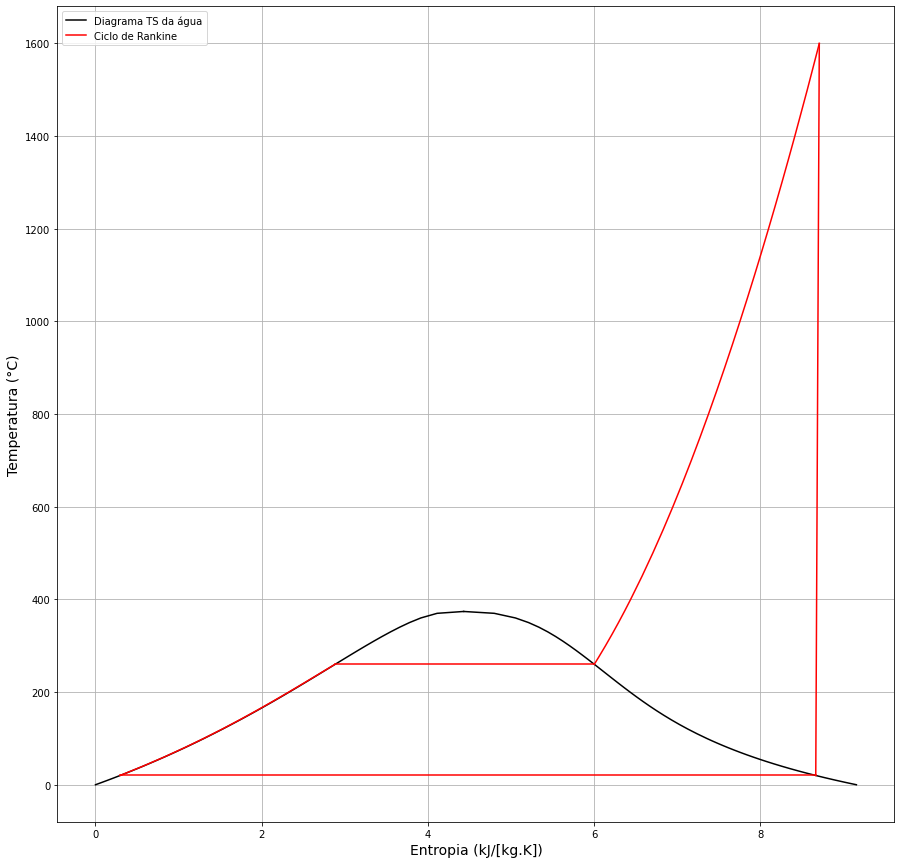

In [13]:
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(111)
df_TS.plot('sf.1', 'T, °C', ax = ax1, c = 'black', legend = True, label = 'Diagrama TS da água')
df_TS.plot('sg.1', 'T, °C', ax = ax1, c = 'black', legend = False)
df_H2O.plot('s.3', 'T', ax = ax1, c = 'red', legend = True, label = 'Ciclo de Rankine')
ax1.plot([2.8844, 6.0028], [260, 260], c = 'red')
ax1.plot(entrop_vap, temp_vap, c = 'red')
ax1.plot([entrop_vap[-1], 8.6680], [temp_vap[-1], 20], c = 'red')
ax1.plot([8.6680, 0.2965], [20, 20], c = 'red')
plt.xlabel('Entropia (kJ/[kg.K])', fontsize = 14)
plt.ylabel('Temperatura (°C)', fontsize = 14)

plt.grid()

plt.show()

Além disso, é possível calcular a entalpia envolvida no condensador, a partir da entalpia de evaporação da água à temperatura de 20 °C e da massa de água utilizada.

In [14]:
ENTALPIA_EVAP_20 = -2454.1 # kJ/kg

ENTALPIA_CONDENSADOR = entalpia_condensador(ENTALPIA_EVAP_20, MASSA_AGUA) # kJ
print(ENTALPIA_CONDENSADOR)

-7459423.587134847


Portanto, a entalpia envolvida no condensador foi igual a **-7459423.58 kJ**.

### Bomba
A água líquida condensada é pressurizada por uma bomba para retornar à caldeira, onde será aquecida novamente. Durante a compressão adiabática realizada pela bomba, a entropia da água é constante. A temperatura da água é geralmente considerada constante durante a compressão adiabática.

## Problema B

Para o cálculo da eficência teórica do ciclo de rankine, é necessário utilizar as constantes obtidas anteriormente. Portanto, é possível pensar em um coeficiente de eficiência como sendo a razão entre o trabalho realizado e a energia adicionada ao sistema, ou seja:

$
\eta_R = \frac{W_T - W_B}{Q_{ext}}
$

Sendo que $W_T$ é o trabalho realizado na turbina, $W_B$ é o trabalho realizado na bomba e $Q_{ext}$ é o calor externo adicionado ao boiler. Em termos de entalpia, a equação fica:

$
\eta_R = \frac{(h_2 - h_3) - (h_1 - h_4)}{h_2 - h_1}
$

Remanejando os termos, é possível obter que:

$
\eta_R = \frac{(h_2 - h_1) - (h_3 - h_4)}{h_2 - h_1}
$

E, portanto:

$
\eta_R = 1 - \frac{h_3 - h_4}{h_2 - h_1}
$

Levando em conta que $h_4 - h_3$ é igual à entalpia utilizada no condensador e que $h_2 - h_1$ é igual a entalpia utilizada no boiler, é possível descrever a eficiência teórica do ciclo de rankine como:

$
\eta_R = 1 - \frac{- H_C}{H_B}
$

Portanto, é possível calcular a eficiência a partir das entalpias calculadas no problema 1.

In [15]:
EFICIENCIA_RANKINE = eficiencia_rankine(ENTALPIA_BOILER, ENTALPIA_CONDENSADOR)

print(EFICIENCIA_RANKINE)

0.5707123902898016


Ou seja, a eficiência teórica para o ciclo de rankine montado é igual a, aproximadamente, 57.1%, isso significa que a quantidade total de trabalho realizado na turbina é igual ao produto da entalpia adicionada ao ciclo pela eficiência do ciclo.

In [16]:
TRABALHO_GERADO = EFICIENCIA_RANKINE*ENTALPIA_COMBUSTAO # kJ
print(TRABALHO_GERADO)

9916860.792865142


Ou seja, ao fim de todo o processo desenvolvido ao longo desse projeto, a quantidade total de trabalho gerado foi de **9916860.79 kJ**.

## Problema C

O ciclo de Carnot é um modelo ideal para ciclos termodinâmicos, em que são consideradas uma fonte de temperatura quente e uma fonte de temperatura fria, a eficiência máxima, dada pelo ciclo de Carnot, é obtida como:

$
\eta_C = 1 - \frac{T_f}{T_q}
$

In [17]:
eficiencia_ciclo_carnot(TEMP_FINAL, TEMP_INIT)

0.8434989189333476

Ou seja, a eficiência máxima de um ciclo termodinâmico nessas condições é de 84.3%. É possível notar que a eficiência obtida pelo ciclo de rankine é menor que a eficiência do ciclo de Carnot, em coerência com a definição de que o ciclo de Carnot representa a maior eficiência teórica para um ciclo termodinâmico.

# Acesse o repositório do projeto!

Para melhor compreensão de cade etapa e de cada escolha do nosso projeto, acesse, clicando aqui ou no link abaixo, nosso [Repositório do Github](https://github.com), onde estão armazenados todos os notebooks e informações referentes aos desafios:

https://github.com/*************

Convidamos você, também, a conferir o arquivo "funcoes_desafio_4", em que estão as funções utilizadas para completar esse desafio.

#
## Referências
- Livro An Introduction to Thermal Physics, Daniel V. Schroeder, Editora Addison-Wesley.
- Livro Physical Chemistry: A Molecular Approach, Donald A. McQuarrie, Editora Univesity Science Books.
        Seções 19-10, 10-11 e 23-1.
- Livro Richard Feynman, Lições de Física Vol 1, Editora Bookman.
        Capítulo de Teoria Cinética dos Gases